In [1]:
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3,preprocess_input,decode_predictions
from keras.preprocessing import image
from keras.optimizers import Adam, SGD
from keras.layers import Dense, GlobalAveragePooling2D
import numpy as np

Using TensorFlow backend.


In [2]:
# Use GPU for learning 

import tensorflow as tf
from keras import backend as K
num_cores = 6

num_CPU = 1
num_GPU = 1

config = tf.ConfigProto(intra_op_parallelism_threads=num_cores,\
        inter_op_parallelism_threads=num_cores, allow_soft_placement=True,\
        device_count = {'CPU' : num_CPU, 'GPU' : num_GPU})
session = tf.Session(config=config)
K.set_session(session)

In [3]:
# Load InceptionV3 model with imagenet pretrained weights

base_model = InceptionV3(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

predictions=Dense(1,activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [4]:
# Fix base_model weights to train just the top layer

for layer in base_model.layers:
    layer.trainable = False

In [5]:
model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

In [6]:
img_height=299
img_width=299

In [7]:
# Create image gererators

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2,zoom_range=0.2, horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory("train", target_size=(img_height,img_width), batch_size=20, class_mode='binary')
valid_generator = valid_datagen.flow_from_directory("valid", target_size=(img_height,img_width), batch_size=20, class_mode='binary')

Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [8]:
# Train the top layer

model.fit_generator(train_generator, steps_per_epoch=200, validation_data=valid_generator, validation_steps=10, epochs=4)

Epoch 1/4
200/200 [==============================] - 159s 794ms/step - loss: 0.4596 - acc: 0.7828 - val_loss: 0.3797 - val_acc: 0.8100
Epoch 2/4
200/200 [==============================] - 156s 779ms/step - loss: 0.3384 - acc: 0.8477 - val_loss: 0.4644 - val_acc: 0.7950
Epoch 3/4
200/200 [==============================] - 157s 783ms/step - loss: 0.3024 - acc: 0.8642 - val_loss: 0.4876 - val_acc: 0.8050
Epoch 4/4
200/200 [==============================] - 157s 783ms/step - loss: 0.2952 - acc: 0.8650 - val_loss: 0.5457 - val_acc: 0.7850


In [10]:
# Check model loss and accuracy

model.evaluate_generator(generator=valid_generator, steps=1)

[0.4864380955696106, 0.800000011920929]

In [11]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_1
1 conv2d_1
2 batch_normalization_1
3 activation_1
4 conv2d_2
5 batch_normalization_2
6 activation_2
7 conv2d_3
8 batch_normalization_3
9 activation_3
10 max_pooling2d_1
11 conv2d_4
12 batch_normalization_4
13 activation_4
14 conv2d_5
15 batch_normalization_5
16 activation_5
17 max_pooling2d_2
18 conv2d_9
19 batch_normalization_9
20 activation_9
21 conv2d_7
22 conv2d_10
23 batch_normalization_7
24 batch_normalization_10
25 activation_7
26 activation_10
27 average_pooling2d_1
28 conv2d_6
29 conv2d_8
30 conv2d_11
31 conv2d_12
32 batch_normalization_6
33 batch_normalization_8
34 batch_normalization_11
35 batch_normalization_12
36 activation_6
37 activation_8
38 activation_11
39 activation_12
40 mixed0
41 conv2d_16
42 batch_normalization_16
43 activation_16
44 conv2d_14
45 conv2d_17
46 batch_normalization_14
47 batch_normalization_17
48 activation_14
49 activation_17
50 average_pooling2d_2
51 conv2d_13
52 conv2d_15
53 conv2d_18
54 conv2d_19
55 batch_normalization_13
56 batch_norma

In [12]:
# Make upper layers trainable

for layer in model.layers[:172]:
    layer.trainable= False
for layer in model.layers[172:]:
    layer.trainable= True

In [13]:
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), metrics=['accuracy'], loss='binary_crossentropy')

In [14]:
# Train model with upper layers

model.fit_generator(train_generator, steps_per_epoch=200, validation_data=valid_generator, validation_steps=10, epochs=4)

Epoch 1/4
200/200 [==============================] - 163s 817ms/step - loss: 0.2166 - acc: 0.9207 - val_loss: 0.4112 - val_acc: 0.7800
Epoch 2/4
200/200 [==============================] - 162s 808ms/step - loss: 0.1531 - acc: 0.9480 - val_loss: 0.3585 - val_acc: 0.7950
Epoch 3/4
200/200 [==============================] - 161s 805ms/step - loss: 0.1159 - acc: 0.9675 - val_loss: 0.3861 - val_acc: 0.8000
Epoch 4/4
200/200 [==============================] - 160s 801ms/step - loss: 0.0905 - acc: 0.9765 - val_loss: 0.3733 - val_acc: 0.8200


In [16]:
# Check model loss and accuracy - approved a bit

model.evaluate_generator(generator=valid_generator, steps=1)

[0.34612739086151123, 0.8500000238418579]

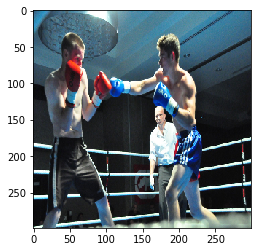

Prediction: MAN - 82.86%


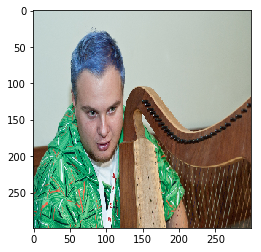

Prediction: WOMAN - 66.47%


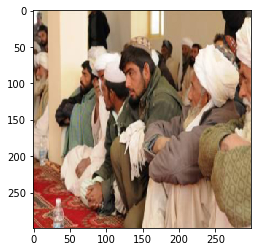

Prediction: WOMAN - 78.14%


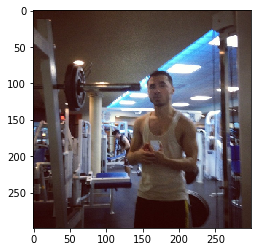

Prediction: WOMAN - 85.96%


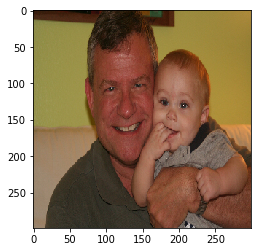

Prediction: WOMAN - 68.81%


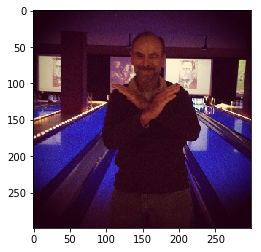

Prediction: MAN - 97.61%


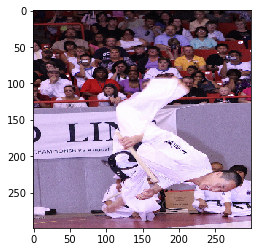

Prediction: MAN - 98.81%


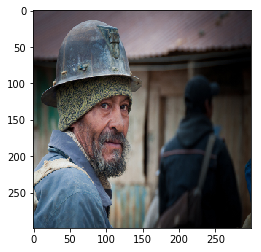

Prediction: MAN - 99.40%


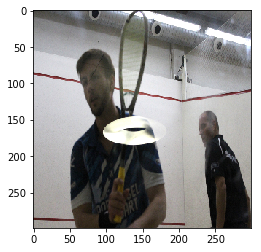

Prediction: MAN - 81.48%


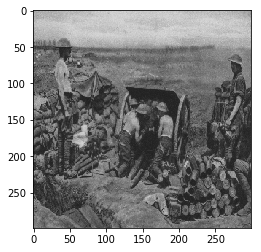

Prediction: MAN - 86.67%


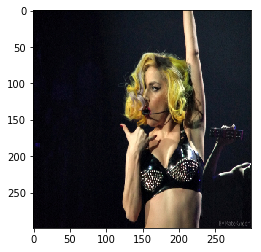

Prediction: WOMAN - 98.84%


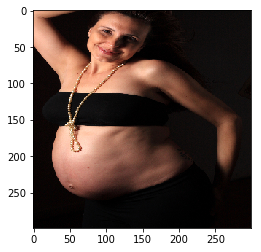

Prediction: WOMAN - 99.63%


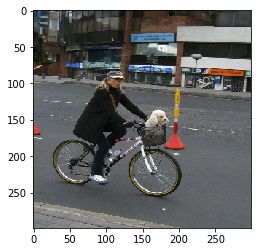

Prediction: MAN - 66.67%


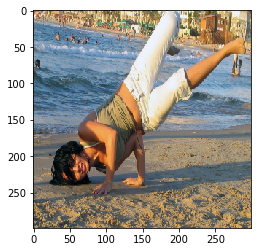

Prediction: WOMAN - 68.91%


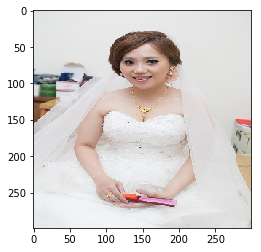

Prediction: WOMAN - 99.63%


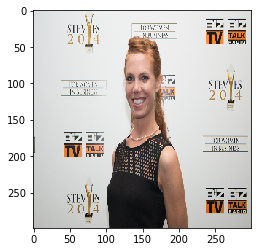

Prediction: WOMAN - 94.91%


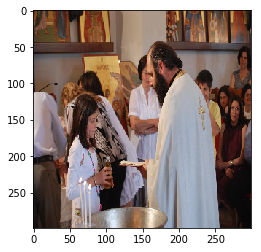

Prediction: MAN - 81.49%


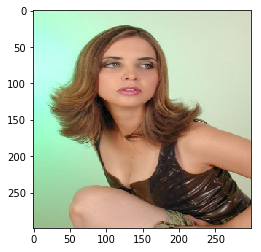

Prediction: WOMAN - 99.98%


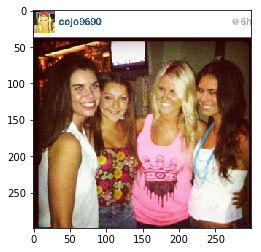

Prediction: WOMAN - 93.32%


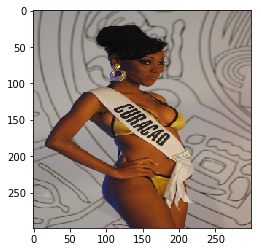

Prediction: WOMAN - 93.63%


In [51]:
# Let's check some images from the test set

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline

# First 10 images of man 
for i in range(501, 511):
    filename = 'test/man/' + str(i) + '.jpg'
    # load an image in PIL format
    original = load_img(filename, target_size=(img_width, img_height))
    numpy_image = img_to_array(original)
    plt.imshow(np.uint8(numpy_image))
    plt.show()

    numpy_image /= 255

    image_batch = np.expand_dims(numpy_image, axis=0)

    res = model.predict(image_batch)
    if(res[0][0]<=.5): 
        print("Prediction: MAN - {0:.2f}%".format((1-res[0][0])*100))
    else: 
        print("Prediction: WOMAN - {0:.2f}%".format(res[0][0]*100))
    
# Then 10 images of woman
for i in range(501, 511):
    filename = 'test/woman/' + str(i) + '.jpg'
    # load an image in PIL format
    original = load_img(filename, target_size=(img_width, img_height))
    numpy_image = img_to_array(original)
    plt.imshow(np.uint8(numpy_image))
    plt.show()

    numpy_image /= 255

    image_batch = np.expand_dims(numpy_image, axis=0)

    res = model.predict(image_batch)
    if(res[0][0]<=.5): 
        print("Prediction: MAN - {0:.2f}%".format((1-res[0][0])*100))
    else: 
        print("Prediction: WOMAN - {0:.2f}%".format(res[0][0]*100))

In [47]:
# Calculate accuracy for each categories as it seems to the model is predicting more 'woman' labels than 'man'
# However the accuracy of each categories is about at the same 78%, so the models precision is better on woman category
# but it also works well for man

image_batch = np.empty((0,299,299,3))

for i in range(501, 601):
    filename = 'test/man/' + str(i) + '.jpg'
    # load an image in PIL format
    original = load_img(filename, target_size=(img_width, img_height))
    numpy_image = img_to_array(original)
    numpy_image /= 255
    
    numpy_image = np.expand_dims(numpy_image, axis=0)
    image_batch = np.append(image_batch, numpy_image, axis=0)

res = model.predict(image_batch)
correct_man_count = (res<0.5).sum()
print('Man test accuracy: {0:.2f}%'.format(correct_man_count))

image_batch = np.empty((0,299,299,3))
for i in range(501, 601):
    filename = 'test/woman/' + str(i) + '.jpg'
    # load an image in PIL format
    original = load_img(filename, target_size=(img_width, img_height))
    numpy_image = img_to_array(original)
    numpy_image /= 255
    
    numpy_image = np.expand_dims(numpy_image, axis=0)
    image_batch = np.append(image_batch, numpy_image, axis=0)

res = model.predict(image_batch)
correct_woman_count = (res>0.5).sum()
print('Woman test accuracy: {0:.2f}%'.format(correct_woman_count))

print('Test accuracy: {0:.2f}%'.format((correct_man_count+correct_woman_count)/2))

Man test accuracy: 77.00%
Woman test accuracy: 79.00%
Test accuracy: 78.00%
